In [257]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [258]:
def generate_examples(num = 1000):
    W = [1.0, -3.0]
    B = 1.0
    W = np.reshape(W, (2, 1))
    X = np.random.randn(num, 2)
    Y = B + np.dot(X, W)
    Y = np.reshape(Y, (num, 1))
    return X, Y

In [259]:
X, Y = generate_examples()

In [260]:
print(X.shape, Y.shape)

(1000, 2) (1000, 1)


## Initialize Parameters

In [261]:
class Model:
    def __init__(self, no_of_features):
        self.no_of_features = no_of_features
        self.W = np.random.randn(no_of_features, 1)
        self.B = np.random.randn()

In [262]:
model = Model(2)
print(model.W)
print(model.B)

[[-0.16973619]
 [ 0.73617262]]
-0.6559738416216822


## Forward Pass

In [263]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.B + np.dot(X, self.W)
        return y_hat

In [264]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [-2.14922997]


## Compute Loss

In [265]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true)) / (2 * y_hat.shape[0])

In [266]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, Y)

In [267]:
loss

17.596037549070637

## Backward Pass

In [268]:
class Model(Model):
    def backward_pass(self, X, y_hat, y_true):
        m = y_hat.shape[0]
        dj_db = np.sum(y_hat - y_true) / m
        dj_dw = np.sum(np.dot(np.reshape((y_hat - y_true), (1, m)), X), axis = 0) / m
        return dj_dw, dj_db

In [269]:
model = Model(2)
y_hat = model.forward_pass(X)
dj_dw, dj_db = model.backward_pass(X, y_hat, Y)

In [270]:
print(dj_dw, dj_db)

[-0.78707502  2.81524732] -2.396951165502013


## Update Parameters

In [271]:
class Model(Model):
    def update_parameters(self, dj_dw, dj_db, lr):
        self.W = self.W - lr * (np.reshape(dj_dw, self.W.shape))
        self.B = self.B - lr * dj_db

## Training Loop

In [272]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dj_dw, dj_db = self.backward_pass(x_train, y_hat, y_train)
            self.update_parameters(dj_dw, dj_db, lr)
            losses.append(loss)
            if (i % 10 == 0):
                print('Iter : {}, Loss = {:.4f}'.format(i, loss))
        return losses

In [273]:
model = Model(2)

In [274]:
x_train, y_train = generate_examples()

In [275]:
losses = model.train(x_train, y_train, 1000, 0.003)

Iter : 0, Loss = 6.4386
Iter : 10, Loss = 6.0429
Iter : 20, Loss = 5.6714
Iter : 30, Loss = 5.3229
Iter : 40, Loss = 4.9957
Iter : 50, Loss = 4.6887
Iter : 60, Loss = 4.4005
Iter : 70, Loss = 4.1301
Iter : 80, Loss = 3.8763
Iter : 90, Loss = 3.6381
Iter : 100, Loss = 3.4145
Iter : 110, Loss = 3.2047
Iter : 120, Loss = 3.0077
Iter : 130, Loss = 2.8229
Iter : 140, Loss = 2.6494
Iter : 150, Loss = 2.4866
Iter : 160, Loss = 2.3338
Iter : 170, Loss = 2.1904
Iter : 180, Loss = 2.0559
Iter : 190, Loss = 1.9295
Iter : 200, Loss = 1.8110
Iter : 210, Loss = 1.6997
Iter : 220, Loss = 1.5953
Iter : 230, Loss = 1.4973
Iter : 240, Loss = 1.4053
Iter : 250, Loss = 1.3190
Iter : 260, Loss = 1.2379
Iter : 270, Loss = 1.1619
Iter : 280, Loss = 1.0905
Iter : 290, Loss = 1.0235
Iter : 300, Loss = 0.9606
Iter : 310, Loss = 0.9016
Iter : 320, Loss = 0.8462
Iter : 330, Loss = 0.7943
Iter : 340, Loss = 0.7455
Iter : 350, Loss = 0.6997
Iter : 360, Loss = 0.6567
Iter : 370, Loss = 0.6164
Iter : 380, Loss = 0.57

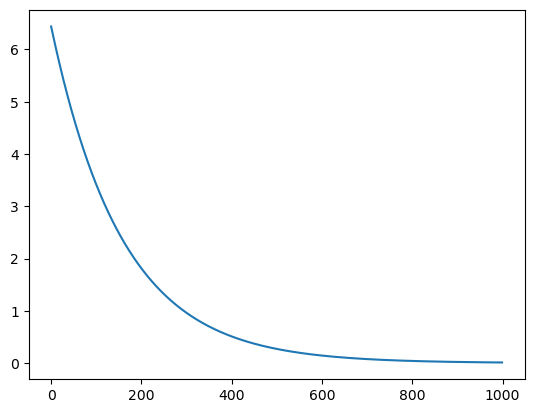

In [276]:
plt.plot(losses)

## Predictions

In [277]:
model_untrained = Model(2)
x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [278]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

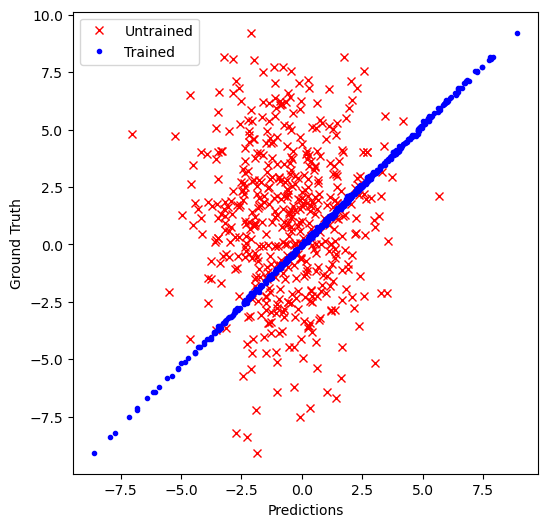

In [279]:
plt.figure(figsize = (6, 6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()